### Generate Datasets

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage.draw
import json

# Add LLMP module to system path
import sys

sys.path.append("../")  # Adds the current directory to the Python path

import LLMP as L

import uuid

# Define the main output directory
main_output_dir = "finetuning-EXP1-5000-10epochs-lora"

# Number of images to generate for each task
num_images_per_task = 5000

# Subdirectories for images and JSON files
image_output_dir = os.path.join(main_output_dir, "images")
json_output_dir = os.path.join(main_output_dir, "json")

# Create directories if they don't exist
os.makedirs(image_output_dir, exist_ok=True)
os.makedirs(json_output_dir, exist_ok=True)

# List of tasks and their respective questions
tasks = {
    "position_common_scale": "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.",
    "position_non_aligned_scale": "Please estimate the vertical position of the block relative to the line on the left (Top is 22, Bottom is 40). So the range is 22 - 40. No explanation.",
    "length": "Estimate the line length from top to bottom (range: 0-100). Number only. No explanation.",
    "direction": "Please estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.",
    "angle": "Please estimate the angle (0-90 degrees). No explanation.",
    "area": "Estimate the area of a circle, ensuring your answer falls within the range of 3.14 to 5026.55 square units. Assume the circle fits within a 100x100 pixel image. Provide only the numeric value, no explanation.",
    "volume": "Estimate the volume of a cube, with your answer restricted to the range of 1 to 8000 cubic units. Assume the cube fits within a 100x100 pixel image. Provide only the numeric value, no explanation.",
    "curvature": "Please estimate the curvature of the line. (0 is no curvature - 1 is the maximum curvature) The more bend the line is, the higher the curvature. No explanation.",
    "shading": "Please estimate the shading density or texture density (range 0 to 100). No explanation."
}



# List to store all data from all tasks
combined_dataset = []

# Loop through each task
for task, question in tasks.items():
    print(f"Generating images and dataset for task: {task}")
    
    # Set up a loop to generte images and collect their labels
    for i in range(num_images_per_task):
        # Generate the image and label for the task using GPImage
    
        image_array, label = L.GPImage.figure1(task)  # Ensure GPImage is defined or imported
        
        # Convert the array to uint8 format (values from 0 to 255)
        image_array_uint8 = (image_array * 255).astype(np.uint8)

        # Convert the NumPy array to a PIL image
        pil_image = Image.fromarray(image_array_uint8)

        # Generate a unique ID for the image
        unique_id = str(uuid.uuid4())

        # Save the image with the unique ID
        image_filename = os.path.join(image_output_dir, f"{unique_id}.jpg")
        pil_image.save(image_filename)

        # Create a JSON entry for the dataset
        json_entry = {
            'id': unique_id,
            'task': task,
            'image': f"{unique_id}.jpg",
            'question': question,
            'value': label
        }

        # Append the JSON entry to the combined dataset list
        combined_dataset.append(json_entry)

# Save the combined dataset as a single JSON file in the JSON folder
combined_json_filename = "combined_dataset.json"
combined_json_filepath = os.path.join(json_output_dir, combined_json_filename)

with open(combined_json_filepath, 'w') as json_file:
    json.dump(combined_dataset, json_file, indent=4)

print(f"Images saved in '{image_output_dir}' and combined dataset saved as '{combined_json_filename}' in '{json_output_dir}'")


Generating images and dataset for task: position_common_scale


KeyboardInterrupt: 

### Distribution of each task

In [3]:
import pandas as pd

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Dictionary to map task keys to descriptive DataFrame variable names
task_dfs = {}

# Loop through each unique task and create a DataFrame for each one
for task_key in df['task'].unique():
    # Filter the main DataFrame for rows that match the current task
    task_df = df[df['task'] == task_key]
    
    # Create a variable name based on the task name
    var_name = f"df_{task_key}"
    
    # Assign the filtered DataFrame to the new variable
    globals()[var_name] = task_df  # Adds the variable to the global namespace
    task_dfs[task_key] = var_name  # Optionally keep track of names in a dictionary

# Now you have individual DataFrames like df_angle, df_position_common_scale, etc.
# For example, to see the first few rows of df_angle:
df_shading.head()


,id,task,image,question,value
40000,7fa0afe5-197d-4e16-a541-b387dc2352ef,shading,7fa0afe5-197d-4e16-a541-b387dc2352ef.jpg,Please estimate the shading density or texture...,42.0
40001,84f6329d-54b5-40a3-b8ce-80881a0144f5,shading,84f6329d-54b5-40a3-b8ce-80881a0144f5.jpg,Please estimate the shading density or texture...,77.0
40002,a6b0697f-8c4a-4bda-aeb6-b8722b9a6c31,shading,a6b0697f-8c4a-4bda-aeb6-b8722b9a6c31.jpg,Please estimate the shading density or texture...,22.0
40003,04038c39-0fe1-4100-84cb-f94b408bb070,shading,04038c39-0fe1-4100-84cb-f94b408bb070.jpg,Please estimate the shading density or texture...,75.0
40004,5cfc7e24-7d33-40ba-ae9e-97c221bce8f8,shading,5cfc7e24-7d33-40ba-ae9e-97c221bce8f8.jpg,Please estimate the shading density or texture...,40.0


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Set the base directory for images
current_directory = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'
base_folder = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'images')

def display_image_for_task_value(task, value):
    """
    Displays the image for the selected task and value with inverted colors and no border.
    """
    task_df = df[df['task'] == task][['value', 'image']]
    task_df['value'] = np.round(task_df['value'], 0).astype(int)
    task_df_filtered = task_df[task_df['value'] == value]
    
    if task_df_filtered.empty:
        return
        
    image_filename = task_df_filtered['image'].iloc[0]
    image_path = os.path.join(base_folder, image_filename)
    
    if os.path.exists(image_path):
        # Open and process the image
        img = Image.open(image_path)
        img_array = np.array(img)
        
        # Find the boundaries of the white background
        rows = np.any(img_array < 255, axis=1)
        cols = np.any(img_array < 255, axis=0)
        ymin, ymax = np.where(rows)[0][[0, -1]]
        xmin, xmax = np.where(cols)[0][[0, -1]]
        
        # Add a small padding
        padding = 10
        ymin = max(0, ymin - padding)
        ymax = min(img_array.shape[0], ymax + padding)
        xmin = max(0, xmin - padding)
        xmax = min(img_array.shape[1], xmax + padding)
        
        # Crop the image
        img_array = img_array[ymin:ymax, xmin:xmax]
        
        # Invert the colors
        img_array = 255 - img_array
        
        # Create figure with black background
        plt.figure(figsize=(5, 5), facecolor='black')
        ax = plt.gca()
        ax.set_facecolor('black')
        
        # Remove padding and margins
        plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)
        
        # Display the image
        plt.imshow(img_array, cmap="gray")
        plt.title(f"{task.capitalize()} - Value: {value}", color='white', pad=2)
        plt.axis("off")
        plt.show()
        plt.close()
    else:
        print(f"Image not found: {image_path}")

# List of all unique tasks in the dataset
unique_tasks = df['task'].unique()

def create_task_slider(task):
    task_df = df[df['task'] == task][['value', 'image']]
    task_df['value'] = np.round(task_df['value'], 0).astype(int)
    unique_values_task = np.sort(task_df['value'].unique())
    
    value_slider = widgets.SelectionSlider(
        options=unique_values_task,
        value=unique_values_task[0],
        description=f"{task.capitalize()} Value:",
        continuous_update=False,
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='500px', height='60px')
    )
    
    value_slider.style.handle_color = 'green'
    
    interactive_widget = widgets.interactive(
        display_image_for_task_value, 
        task=widgets.fixed(task), 
        value=value_slider
    )
    
    display(interactive_widget)

# Create and display sliders for all tasks
for task in unique_tasks:
    create_task_slider(task)

interactive(children=(SelectionSlider(continuous_update=False, description='Position_common_scale Value:', lay…

interactive(children=(SelectionSlider(continuous_update=False, description='Position_non_aligned_scale Value:'…

interactive(children=(SelectionSlider(continuous_update=False, description='Length Value:', layout=Layout(heig…

interactive(children=(SelectionSlider(continuous_update=False, description='Direction Value:', layout=Layout(h…

interactive(children=(SelectionSlider(continuous_update=False, description='Angle Value:', layout=Layout(heigh…

interactive(children=(SelectionSlider(continuous_update=False, description='Area Value:', layout=Layout(height…

interactive(children=(SelectionSlider(continuous_update=False, description='Volume Value:', layout=Layout(heig…

interactive(children=(SelectionSlider(continuous_update=False, description='Curvature Value:', layout=Layout(h…

interactive(children=(SelectionSlider(continuous_update=False, description='Shading Value:', layout=Layout(hei…

In [15]:
# Count the number of unique labels (values) for each task
label_counts = df.groupby('task')['value'].nunique()

# Print the label counts for each task
print("Number of labels for each task:")
for task, count in label_counts.items():
    print(f"{task.capitalize()}: {count} labels")


Number of labels for each task:
Angle: 90 labels
Area: 40 labels
Curvature: 80 labels
Direction: 360 labels
Length: 60 labels
Position_common_scale: 60 labels
Position_non_aligned_scale: 20 labels
Shading: 100 labels
Volume: 20 labels


### Check unique value for each task

In [1]:
import pandas as pd

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Create and print unique values for each task-specific DataFrame
for task_key in df['task'].unique():
    # Create a DataFrame for the specific task
    task_df = df[df['task'] == task_key]
    
    # Round the 'value' column to 2 decimal places
    task_df['value'] = task_df['value'].round(2)
    
    # Assign the task-specific DataFrame to a variable with a dynamic name
    globals()[f"df_{task_key}"] = task_df
    
    # Print the unique values in the 'value' column for each task
    print(f"Unique values in {task_key}:")
    print(task_df['value'].unique())
    print("\n")

import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Set the base directory
current_directory = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'

# Path to the JSON file
json_file_path = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'json', 'combined_dataset.json')

# Path to the image folder
base_folder = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'images')

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Dictionary to map simplified task names to full questions
task_descriptions = {
    "position_common_scale": "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.",
    "position_non_aligned_scale": "Please estimate the vertical position of the block relative to a misaligned line on the left. (Top is 0, Bottom is 60). No explanation.",
    "length": "Please estimate the length of the vertical line (from top to bottom). The height of the whole image is 100. No explanation.",
    "direction": "Please estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.",
    "angle": "Please estimate the angle (0-90 degrees). No explanation.",
    #"area": "Please estimate the area covered by the circle. The whole image is 100x100 with an area of 10000. No explanation.",
    #"volume": "Please estimate the volume of the cube. The cube size is relative to the image size of 100x100. No explanation.",
    #"curvature": "Please estimate the curvature of the line. (0 is no curvature - 1 is the maximum curvature) The more bend the line is, the higher the curvature. No explanation.",
    #s"shading": "Please estimate the shading density or texture density (range 0 to 100). No explanation."
}

# Create separate DataFrames for each task and assign them dynamically
for task_key in df['task'].unique():
    globals()[f"df_{task_key}"] = df[df['task'] == task_key]

def display_images_for_task_and_value(task_key, value):
    """
    Displays one unique image for the specified task and value.
    
    Parameters:
    - task_key: The simplified name of the task (e.g., "area").
    - value: The specific value for which to display the image.
    """
    # Get the specific DataFrame for the task
    task_df = globals().get(f"df_{task_key}", None)
    if task_df is None:
        print("Invalid task. Please provide a valid task name.")
        return

    # Convert the value to a float, since the dataset has floating-point values
    try:
        value = float(value)
    except ValueError:
        print(f"Invalid value '{value}' for task '{task_key}'. Value must be a number.")
        return

    # Filter the DataFrame for the specified value and get the first unique image
    unique_images = task_df[task_df['value'] == value]['image'].unique()

    if not unique_images.size:
        print(f"No images found for task '{task_key}' with value {value:.2f}.")
        return

    # Display the image
    image_filename = unique_images[0]
    image_path = os.path.join(base_folder, image_filename)

    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap="gray")
        plt.title(f"{task_key.capitalize()}\nValue: {value:.2f}")
        plt.axis("off")
        plt.show()
    else:
        print(f"Image not found: {image_path}")

# Function to dynamically update the slider range based on unique values in the dataset for the selected task
def update_slider_range(task_key):
    task_df = globals().get(f"df_{task_key}", None)
    if task_df is not None:
        # Get unique values from the specified task DataFrame
        unique_values = task_df['value'].unique()
        min_val, max_val = int(unique_values.min()), int(unique_values.max())
        
        # Update the slider's min, max, and reset to min value
        value_slider.min = min_val
        value_slider.max = max_val
        value_slider.value = min_val  # Reset to minimum for consistency
    else:
        print("Task not found. Please provide a valid task name.")

# Interactive widgets
task_dropdown = widgets.Dropdown(
    options=list(task_descriptions.keys()),
    description="Task:",
    value="position_common_scale",  # Default task
)

# Create a slider with a default range
value_slider = widgets.IntSlider(
    value=0,  # Default value (will be updated dynamically)
    min=0,
    max=100,
    step=1,
    description="Value:"
)

# Link the task selection with the slider range update
widgets.interactive(update_slider_range, task_key=task_dropdown)

# Define an interactive function to update the display based on slider and dropdown
display_widget = widgets.interactive(display_images_for_task_and_value, task_key=task_dropdown, value=value_slider)

# Display only one instance of the dropdown and slider widgets
display(task_dropdown)
display(value_slider)
display(display_widget)

# Initialize the slider range based on the default task
update_slider_range(task_dropdown.value)

/tmp/ipykernel_271602/804828119.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  task_df['value'] = task_df['value'].round(2)


Unique values in position_common_scale:
[22. 14. 43. 31.  6. 18. 19.  5.  8.  2. 48. 37. 42. 13.  9. 24. 39. 50.
 30. 20. 59. 47. 45. 25. 46. 16.  1. 27. 12. 33. 38. 51. 34. 36. 10. 44.
  4. 11. 28. 58. 32. 21. 55. 54. 15. 49. 35. 17. 53. 52.  3.  7. 41.  0.
 40. 56. 26. 29. 57. 23.]


Unique values in position_non_aligned_scale:
[30. 38. 32. 37. 40. 23. 26. 31. 36. 24. 27. 25. 33. 29. 39. 22. 35. 21.
 28. 34.]


Unique values in length:
[60.  3. 35. 36. 13. 28.  2. 43. 46. 53. 16. 11. 41. 33.  6. 57. 54. 40.
 26. 49. 12.  7. 20.  1. 19. 37. 44. 59.  4. 29. 31. 14.  5. 38. 58. 15.
 48. 55. 45. 25. 27. 56. 18. 47. 21. 51.  8. 30. 52. 39. 10. 24. 17. 32.
  9. 34. 23. 22. 50. 42.]


Unique values in direction:
[ 21. 234. 345. 109. 217. 163. 238. 206.  52. 243. 173. 274.  38. 322.
  93.  65. 319. 311. 152. 328. 356. 107.  85. 196. 210. 218.  26. 165.
  64.  86. 324. 244. 354.  36. 160. 162. 286.  66. 101. 353. 347.  72.
 308. 336. 249. 104.  78. 278. 287. 316. 177. 331. 332. 112. 299. 182.

Dropdown(description='Task:', options=('position_common_scale', 'position_non_aligned_scale', 'length', 'direc…

IntSlider(value=0, description='Value:', max=59)

interactive(children=(Dropdown(description='Task:', options=('position_common_scale', 'position_non_aligned_sc…

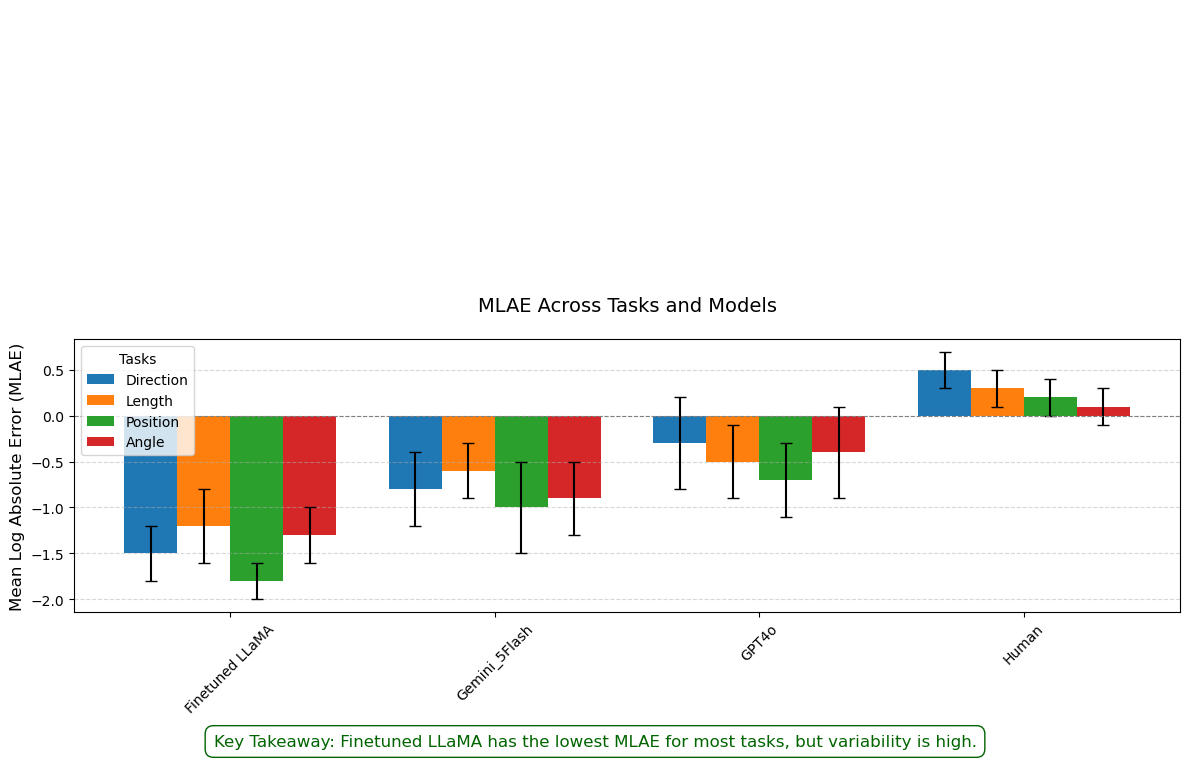

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Mock data for illustration
tasks = ["Direction", "Length", "Position", "Angle"]
models = ["Finetuned LLaMA", "Gemini_5Flash", "GPT4o", "Human"]
images = ["direction.png", "length.png", "position.png", "angle.png"]  # Replace with actual paths
mlae_values = {
    "Direction": [-1.5, -0.8, -0.3, 0.5],
    "Length": [-1.2, -0.6, -0.5, 0.3],
    "Position": [-1.8, -1.0, -0.7, 0.2],
    "Angle": [-1.3, -0.9, -0.4, 0.1],
}
ci_values = {
    "Direction": [0.3, 0.4, 0.5, 0.2],
    "Length": [0.4, 0.3, 0.4, 0.2],
    "Position": [0.2, 0.5, 0.4, 0.2],
    "Angle": [0.3, 0.4, 0.5, 0.2],
}

# Create a figure
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('white')

# Add task images in the top row
ax_imgs = fig.add_subplot(2, 1, 1)
ax_imgs.axis("off")
for i, img_path in enumerate(images):
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        ax = fig.add_subplot(2, len(tasks), i + 1)
        ax.imshow(img, cmap="gray")
        ax.axis("off")
        ax.set_title(tasks[i], fontsize=10, pad=10)

# Combined MLAE chart
ax_chart = fig.add_subplot(2, 1, 2)
bar_width = 0.2
x = np.arange(len(models))

for i, task in enumerate(tasks):
    y = mlae_values[task]
    yerr = ci_values[task]
    ax_chart.bar(x + i * bar_width, y, bar_width, yerr=yerr, label=task, capsize=4)

# Chart customizations
ax_chart.set_xticks(x + bar_width * (len(tasks) - 1) / 2)
ax_chart.set_xticklabels(models, rotation=45, fontsize=10)
ax_chart.axhline(0, color="gray", linestyle="--", linewidth=0.8)
ax_chart.set_ylabel("Mean Log Absolute Error (MLAE)", fontsize=12)
ax_chart.set_title("MLAE Across Tasks and Models", fontsize=14, pad=20)
ax_chart.legend(title="Tasks", loc="upper left", fontsize=10)
ax_chart.grid(axis="y", linestyle="--", alpha=0.5)

# Add a key takeaway below the chart
plt.figtext(0.5, 0.01, "Key Takeaway: Finetuned LLaMA has the lowest MLAE for most tasks, but variability is high.", 
            ha="center", fontsize=12, color="darkgreen", bbox=dict(facecolor="white", edgecolor="darkgreen", boxstyle="round,pad=0.5"))

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Volume

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Set the base directory for images
current_directory = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'
base_folder = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'images')

# Filter the DataFrame to include only rows where the 'task' is 'volume'
df_volume = df[df['task'] == 'volume'][['value', 'image']]  # Select only 'value' and 'image' columns for the 'volume' task

# Round the 'value' column to 0 decimal places and cast it to integers
df_volume['value'] = np.round(df_volume['value'], 0).astype(int)

# Get unique volume values (now as integers)
unique_values_volume = np.sort(df_volume['value'].unique())  # Sort the unique values

# Function to display image for the selected volume value
def display_image_for_volume_value(value):
    """
    Displays the image for the specified volume value.
    
    Parameters:
    - value: The specific volume value for which to display the image.
    """
    # Print the value to check if the slider is working
    print(f"Slider value: {value}")
    
    # Find the row where the value matches
    df_volume_filtered = df_volume[df_volume['value'] == value]

    # If no matching value, display message
    if df_volume_filtered.empty:
        print(f"No image found for volume value {value:.2f}.")
        return

    # Get the image filename from the filtered DataFrame
    image_filename = df_volume_filtered['image'].iloc[0]  # Get the first matched image filename
    image_path = os.path.join(base_folder, image_filename)  # Full path to the image

    # Print the full image path for debugging
    print(f"Image path: {image_path}")

    # Check if image exists and display it
    if os.path.exists(image_path):
        print(f"Image found: {image_path}")  # Debugging output
        img = Image.open(image_path)  # Open the image file
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap="gray")  # Display the image in grayscale

        # Since 'value' is already an integer, just use it directly
        plt.title(f"Volume - Value: {value}")
        plt.axis("off")  # Hide the axes
        plt.show()
    else:
        print(f"Image not found: {image_path}")


# Interactive slider widget for volume values (rounded to 0)
value_slider_volume = widgets.SelectionSlider(
    options=unique_values_volume,  # Set the options to the unique values
    value=unique_values_volume[0],  # Set the initial value to the first unique volume value
    description="Volume Value:",
    continuous_update=False
)

# Link the slider with the display function for volume
interactive_widget_volume = widgets.interactive(display_image_for_volume_value, value=value_slider_volume)

# Display the slider widget for volume
display(interactive_widget_volume)


interactive(children=(SelectionSlider(continuous_update=False, description='Volume Value:', options=(1, 8, 27,…

## Curvature

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
import numpy as np

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Set the base directory for images
current_directory = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'
base_folder = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'images')

# Function to display the image for `curvature` task and value
def display_curvature_image(value):
    """
    Displays the image for the curvature task and the selected value with inverted colors and no border.
    
    Parameters:
    - value: The specific value for the curvature task.
    """
    # Filter the DataFrame for the curvature task
    task_df = df[df['task'] == 'curvature'][['value', 'image']]
    task_df['value'] = np.round(task_df['value'], 3)  # Round values to 3 decimal places for consistency
    task_df_filtered = task_df[task_df['value'] == np.round(value, 3)]  # Match rounded value
    
    if task_df_filtered.empty:
        print(f"No image found for curvature value {value}.")
        return

    # Get the image filename and construct the full path
    image_filename = task_df_filtered['image'].iloc[0]
    image_path = os.path.join(base_folder, image_filename)

    if os.path.exists(image_path):
        # Open the image
        img = Image.open(image_path)
        img_array = np.array(img)

        # Detect non-white areas to crop
        rows = np.any(img_array < 255, axis=1)
        cols = np.any(img_array < 255, axis=0)
        ymin, ymax = np.where(rows)[0][[0, -1]]
        xmin, xmax = np.where(cols)[0][[0, -1]]

        # Add a small padding to the cropped area
        padding = 10
        ymin = max(0, ymin - padding)
        ymax = min(img_array.shape[0], ymax + padding)
        xmin = max(0, xmin - padding)
        xmax = min(img_array.shape[1], xmax + padding)

        # Crop the image to the detected boundaries
        img_array = img_array[ymin:ymax, xmin:xmax]

        # Invert the colors
        img_array = 255 - img_array

        # Display the processed image
        plt.figure(figsize=(5, 5), facecolor='black')  # Set black background
        ax = plt.gca()
        ax.set_facecolor('black')  # Set axes background to black
        plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)  # Remove margins
        plt.imshow(img_array, cmap="gray")
        plt.title(f"Curvature - Value: {value:.3f}", color='white', pad=10)  # Show value with 3 decimal places
        plt.axis("off")
        plt.show()
    else:
        print(f"Image not found: {image_path}")

# Filter the DataFrame for `curvature` and get unique rounded values
curvature_df = df[df['task'] == 'curvature'][['value', 'image']]
curvature_df['value'] = np.round(curvature_df['value'], 3)  # Round to 3 decimal places
unique_values_curvature = np.sort(curvature_df['value'].unique())  # Sort unique float values

# Create a slider widget for `curvature` values
curvature_slider = widgets.SelectionSlider(
    options=unique_values_curvature,
    value=unique_values_curvature[0],
    description="Curvature Value:",
    continuous_update=False,
    style={'description_width': '150px'},
    layout=widgets.Layout(width='500px', height='50px')
)

# Customize the slider handle color
curvature_slider.style.handle_color = 'green'

# Create an interactive widget for displaying `curvature` images
interactive_widget = widgets.interactive(
    display_curvature_image,
    value=curvature_slider
)

# Display the slider and interactive widget
display(interactive_widget)


interactive(children=(SelectionSlider(continuous_update=False, description='Curvature Value:', layout=Layout(h…

In [4]:
df_curvature

,value,image
35000,0,d8433dca-4467-41c0-a1cb-2930a05b0564.jpg
35001,0,ab41b855-4338-4eca-82fb-804a387bad7a.jpg
35002,0,d1dc937d-e233-4400-846d-5b0566f3bf17.jpg
35003,0,541dac3f-75c5-40b6-a03a-6653e409e470.jpg
35004,0,0033d679-8110-42b5-b5f9-248813d30b74.jpg
...,...,...
39995,0,a4a64b13-1aba-41a2-aaae-184f5445e08a.jpg
39996,0,930120db-06a5-4baf-ad97-81c3710bde81.jpg
39997,0,ebe8717a-668b-4330-826f-9e3ebef8813c.jpg
39998,0,636bc695-83ad-410b-831f-df696106f4a2.jpg


## Area

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Set the base directory for images
current_directory = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'
base_folder = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'images')

# Filter the DataFrame to include only rows where the 'task' is 'area'
area_df = df[df['task'] == 'area'][['value', 'image']]  # Select only 'value' and 'image' columns for the 'area' task

# Round the 'value' column to 0 decimal places and cast it to integers
area_df['value'] = np.round(area_df['value'], 0).astype(int)

# Get unique area values (now as integers)
unique_values_area = np.sort(area_df['value'].unique())  # Sort the unique values

# Function to display image for the selected area value
def display_image_for_area_value(value):
    """
    Displays the image for the specified area value.
    
    Parameters:
    - value: The specific area value for which to display the image.
    """
    # Print the value to check if the slider is working
    print(f"Slider value: {value}")
    
    # Find the row where the value matches
    area_df_filtered = area_df[area_df['value'] == value]

    # If no matching value, display message
    if area_df_filtered.empty:
        print(f"No image found for area value {value:.2f}.")
        return

    # Get the image filename from the filtered DataFrame
    image_filename = area_df_filtered['image'].iloc[0]  # Get the first matched image filename
    image_path = os.path.join(base_folder, image_filename)  # Full path to the image

    # Print the full image path for debugging
    print(f"Image path: {image_path}")

    # Check if image exists and display it
    if os.path.exists(image_path):
        print(f"Image found: {image_path}")  # Debugging output
        img = Image.open(image_path)  # Open the image file
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap="gray")  # Display the image in grayscale

        # Since 'value' is already an integer, just use it directly
        plt.title(f"Area - Value: {value}")
        plt.axis("off")  # Hide the axes
        plt.show()
    else:
        print(f"Image not found: {image_path}")


# Interactive slider widget for area values (rounded to 0)
value_slider = widgets.SelectionSlider(
    options=unique_values_area,  # Set the options to the unique values
    value=unique_values_area[0],  # Set the initial value to the first unique area value
    description="Area Value:",
    continuous_update=False
)

# Link the slider with the display function
interactive_widget = widgets.interactive(display_image_for_area_value, value=value_slider)

# Display the slider widget
display(interactive_widget)


## Shading

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

# Path to the JSON file
json_file_path = './finetuning-EXP1-5000-5epochs-test/json/combined_dataset.json'

# Load JSON file into a DataFrame
df = pd.read_json(json_file_path)

# Set the base directory for images
current_directory = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP'
base_folder = os.path.join(current_directory, 'finetuning-EXP1-5000-5epochs-test', 'images')

# Assuming there's a column 'task' indicating the task type, and 'value' corresponds to shading values
# Filter the DataFrame to include only rows where the 'task' is 'shading'
shading_df = df[df['task'] == 'shading'][['value', 'image']]  # Select only 'value' and 'image' columns for shading task

# Get unique shading values
unique_values_shading = shading_df['value'].unique()  # Get unique shading values

# Function to display image for the selected shading value
def display_image_for_shading_value(value):
    """
    Displays the image for the specified shading value.
    
    Parameters:
    - value: The specific shading value for which to display the image.
    """
    # Print the value to check if the slider is working
    print(f"Slider value: {value}")
    
    # Find the row where the value matches
    shading_df_filtered = shading_df[shading_df['value'] == value]

    # If no matching value, display message
    if shading_df_filtered.empty:
        print(f"No image found for shading value {value:.2f}.")
        return

    # Get the image filename from the filtered DataFrame
    image_filename = shading_df_filtered['image'].iloc[0]  # Get the first matched image filename
    image_path = os.path.join(base_folder, image_filename)  # Full path to the image

    # Print the full image path for debugging
    print(f"Image path: {image_path}")

    # Check if image exists and display it
    if os.path.exists(image_path):
        print(f"Image found: {image_path}")  # Debugging output
        img = Image.open(image_path)  # Open the image file
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap="gray")  # Display the image in grayscale

        # Since 'value' is already an integer, just use it directly
        plt.title(f"Shading - Value: {value}")
        plt.axis("off")  # Hide the axes
        plt.show()
    else:
        print(f"Image not found: {image_path}")


# Interactive slider widget for shading values (rounded to 0)
value_slider = widgets.IntSlider(
    value=int(unique_values_shading[0]),  # Set the initial value to the first unique shading value, rounded to 0
    min=int(min(unique_values_shading)),
    max=int(max(unique_values_shading)),
    step=1,  # Step size is 1 because the unique values are integers
    description="Shading Value:",
    continuous_update=False
)


# Link the slider with the display function
widgets.interactive(display_image_for_shading_value, value=value_slider)


interactive(children=(IntSlider(value=42, continuous_update=False, description='Shading Value:', min=1), Outpu…